# Node Feature Ranking

Taking all nodes from all graphs (across all mu levels), we split nodes into "stable" (50% lower entropy nodes) and "unstable" (50% higher entropy nodes) and use a random forest to determine which node features are most important in the associated binary classification task. For this v3 notebook, we do this for multiple community finding algorithms.

In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Louvain Experiment

First, we will run the same experiment we've run before with Louvain data. The only difference is the addition of the eigenvector centrality.

In [2]:
X_train = pd.read_csv('../LFR_Graph_Data/Louvain_Data/node_x_train.csv', index_col=0)
y_train = pd.read_csv('../LFR_Graph_Data/Louvain_Data/node_y_train.csv', index_col=0)

### Feature ranking with random forest

Now we're going to perform the node feature ranking using a random forest. During training, we will use a stratified k-fold cross-validation scheme.

In [3]:
runs = 100

In [4]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

### Check accuracy scores

Let's have a look at the accuracy scores to make sure the model is working.

In [6]:
print(accuracy_scores)
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.9, 0.9078125, 0.896875, 0.903125, 0.9, 0.896875, 0.9, 0.8984375, 0.8953125, 0.8984375, 0.9015625, 0.9, 0.9015625, 0.89375, 0.8984375, 0.9, 0.8953125, 0.8984375, 0.8953125, 0.8953125, 0.8953125, 0.896875, 0.9, 0.896875, 0.896875, 0.9015625, 0.8953125, 0.9, 0.8984375, 0.896875, 0.896875, 0.9, 0.8984375, 0.9, 0.9015625, 0.8984375, 0.8953125, 0.8984375, 0.896875, 0.8984375, 0.896875, 0.8921875, 0.8953125, 0.8984375, 0.8984375, 0.8953125, 0.9, 0.9015625, 0.9, 0.8953125, 0.89375, 0.896875, 0.8984375, 0.9, 0.8921875, 0.9, 0.9, 0.9, 0.896875, 0.8984375, 0.9, 0.89375, 0.896875, 0.9015625, 0.8890625, 0.9015625, 0.9, 0.9015625, 0.8984375, 0.8984375, 0.896875, 0.9, 0.903125, 0.896875, 0.896875, 0.9, 0.890625, 0.9046875, 0.8953125, 0.9, 0.8984375, 0.9015625, 0.896875, 0.903125, 0.9015625, 0.9, 0.9, 0.903125, 0.89375, 0.9, 0.89375, 0.9, 0.8953125, 0.903125, 0.9, 0.9, 0.9, 0.8953125, 0.9, 0.9015625, 0.8953125, 0.8953125, 0.8984375, 0.9015625, 0.8984375, 0.9, 0.9, 0.903125, 0.8984375, 0.903125, 0.8

### Feature ranking

From the accuracy scores, we can see that the model is definitely learning something, so now let's rank the features.

In [7]:
df_importances = pd.DataFrame(rows).set_index("run")

In [8]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

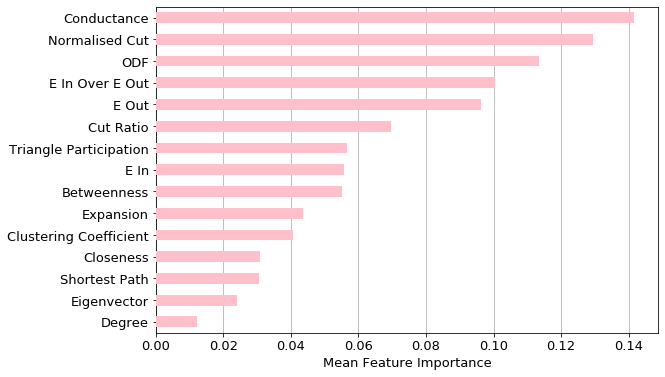

In [10]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color='pink', zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

## Infomap data

Now we run the same experiment using Infomap data, which has not been done before.

In [12]:
X_train = pd.read_csv('../LFR_Graph_Data/Infomap_Data/node_x_train.csv', index_col=0)
y_train = pd.read_csv('../LFR_Graph_Data/Infomap_Data/node_y_train.csv', index_col=0)

### Feature ranking with random forest

Now we're going to perform the node feature ranking using a random forest. During training, we will use a stratified k-fold cross-validation scheme.

In [13]:
runs = 100

In [14]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

### Check accuracy scores

Let's have a look at the accuracy scores to make sure the model is working.

In [16]:
print(accuracy_scores)
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.928125, 0.934375, 0.9265625, 0.93125, 0.93125, 0.9296875, 0.93125, 0.9328125, 0.921875, 0.93125, 0.9296875, 0.9328125, 0.9328125, 0.934375, 0.9359375, 0.9296875, 0.934375, 0.9265625, 0.934375, 0.93125, 0.9296875, 0.9328125, 0.9296875, 0.9265625, 0.93125, 0.928125, 0.9359375, 0.928125, 0.93125, 0.9328125, 0.93125, 0.9234375, 0.9265625, 0.928125, 0.928125, 0.9328125, 0.93125, 0.928125, 0.9296875, 0.9296875, 0.9328125, 0.928125, 0.925, 0.934375, 0.93125, 0.93125, 0.9328125, 0.9296875, 0.9328125, 0.93125, 0.93125, 0.928125, 0.9296875, 0.928125, 0.928125, 0.9296875, 0.9296875, 0.93125, 0.9296875, 0.9328125, 0.9359375, 0.925, 0.93125, 0.9359375, 0.928125, 0.934375, 0.9328125, 0.934375, 0.934375, 0.93125, 0.934375, 0.9296875, 0.9296875, 0.9296875, 0.928125, 0.9296875, 0.9296875, 0.9296875, 0.93125, 0.934375, 0.934375, 0.9296875, 0.934375, 0.93125, 0.934375, 0.928125, 0.925, 0.934375, 0.9359375, 0.9296875, 0.925, 0.9328125, 0.9296875, 0.9296875, 0.934375, 0.93125, 0.9328125, 0.93125, 0.9234

### Feature ranking

From the accuracy scores, we can see that the model is definitely learning something, so now let's rank the features.

In [17]:
df_importances = pd.DataFrame(rows).set_index("run")

In [18]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

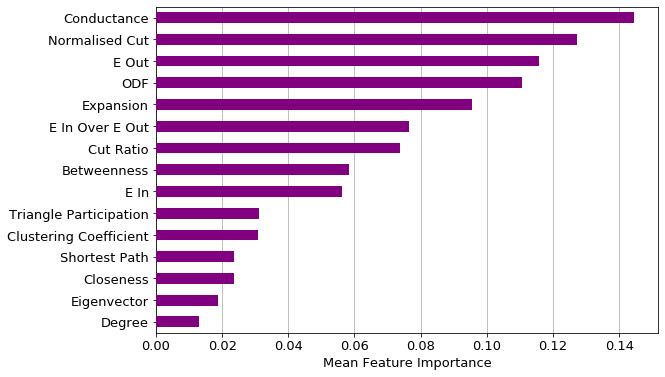

In [19]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="purple", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

## LPA Experiment

Now we run the same experiment using LPA data, which has not been done before.

In [20]:
X_train = pd.read_csv('../LFR_Graph_Data/LPA_Data/node_x_train.csv', index_col=0)
y_train = pd.read_csv('../LFR_Graph_Data/LPA_Data/node_y_train.csv', index_col=0)

### Feature ranking with random forest

Now we're going to perform the node feature ranking using a random forest. During training, we will use a stratified k-fold cross-validation scheme.

In [21]:
runs = 100

In [22]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

### Check accuracy scores

Let's have a look at the accuracy scores to make sure the model is working.

In [24]:
print(accuracy_scores)
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.9, 0.8984375, 0.909375, 0.8984375, 0.9109375, 0.9, 0.9078125, 0.9, 0.8984375, 0.9015625, 0.9140625, 0.9078125, 0.89375, 0.8984375, 0.909375, 0.903125, 0.9, 0.8953125, 0.9078125, 0.903125, 0.896875, 0.9078125, 0.896875, 0.9046875, 0.9109375, 0.9046875, 0.9078125, 0.9046875, 0.9078125, 0.903125, 0.9078125, 0.896875, 0.9078125, 0.909375, 0.9, 0.9046875, 0.8953125, 0.9125, 0.909375, 0.903125, 0.915625, 0.9046875, 0.9046875, 0.9, 0.9, 0.903125, 0.9015625, 0.9, 0.909375, 0.903125, 0.9078125, 0.909375, 0.90625, 0.903125, 0.8921875, 0.90625, 0.9046875, 0.90625, 0.9015625, 0.909375, 0.9046875, 0.9015625, 0.9, 0.9, 0.903125, 0.903125, 0.9046875, 0.90625, 0.90625, 0.903125, 0.9046875, 0.90625, 0.909375, 0.9046875, 0.903125, 0.9078125, 0.9109375, 0.9015625, 0.9078125, 0.9, 0.9140625, 0.8984375, 0.9109375, 0.9125, 0.9140625, 0.9046875, 0.90625, 0.909375, 0.9171875, 0.903125, 0.8984375, 0.9015625, 0.9015625, 0.8984375, 0.9046875, 0.9046875, 0.90625, 0.9, 0.90625, 0.903125, 0.896875, 0.903125, 0.9

### Feature ranking

From the accuracy scores, we can see that the model is definitely learning something, so now let's rank the features.

In [25]:
df_importances = pd.DataFrame(rows).set_index("run")

In [26]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

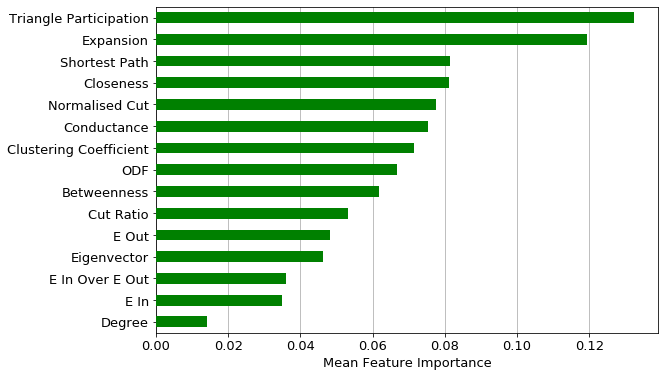

In [27]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color='green', zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()